In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [4]:
mnist = keras.datasets.mnist

In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

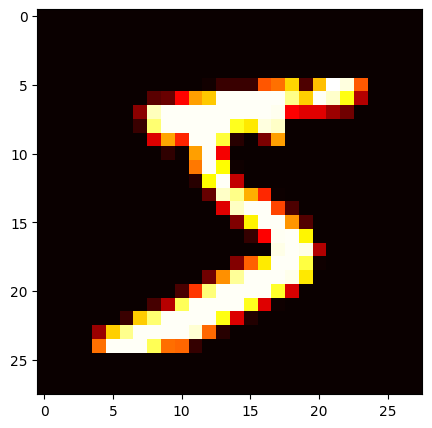

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(train_X[0], cmap='hot')
plt.grid(False)

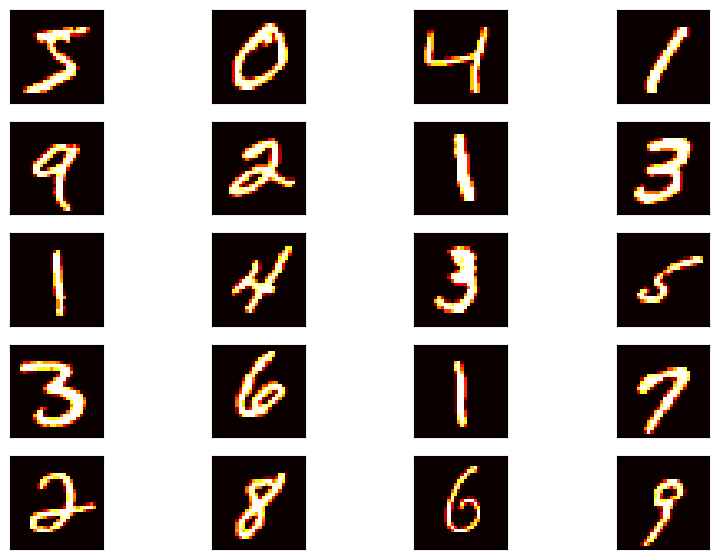

In [20]:
plt.figure(figsize=(10, 7))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(train_X[i], cmap='hot')
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)


In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2819 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.9082
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.9078
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2905 - accuracy: 0.9092
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.9079
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2844 - accuracy: 0.9104
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9144
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2838 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.274

In [27]:
pred = model.predict(test_X)

313/313 [==============================] - 1s 3ms/step


In [30]:
pred_y = np.argmax(pred, axis=1)

accuracy = accuracy_score(test_y, pred_y)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(test_y, pred_y, average=None)}')

matrix = confusion_matrix(test_y, pred_y)
print(f'\nMatrix:\n{matrix}\n')

Accuracy = 0.9143

F1: [0.94630193 0.96972356 0.92450073 0.88964511 0.90646766 0.88752098
 0.93112377 0.92711948 0.87506589 0.87418546]

Matrix:
[[ 934    0    4    9    1   13   10    2    3    4]
 [   0 1105    8    7    0    0    4    3    7    1]
 [  12    4  949   11    9    6   14   13   12    2]
 [   2    4    7  915    0   32    2   15   26    7]
 [   2    3    6    1  911    1   15    3    4   36]
 [  11    2    4   39    1  793    7    5   21    9]
 [  14    4   11    1   12   14  899    1    2    0]
 [   2    6   19   13    4    2    1  935    3   43]
 [   9    9   13   41   10   28   20    2  830   12]
 [   8    7    0   10   80    6    1   10   15  872]]

